In [5]:
%matplotlib inline

In [6]:
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import os

In [7]:
os.environ['GAMMAPY_DATA'] = './gammapy-data/1.0.1'

! echo $GAMMAPY_DATA

./gammapy-data/1.0.1


In [8]:
from gammapy.maps import Map

In [9]:
gc_3fhl = Map.read('$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-counts.fits.gz')

In [10]:
print(gc_3fhl)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (400, 200)
	ndim  : 2
	unit  : 
	dtype : >i8



In [11]:
print(gc_3fhl.geom)

WcsGeom

	axes       : ['lon', 'lat']
	shape      : (400, 200)
	ndim       : 2
	frame      : galactic
	projection : CAR
	center     : 0.0 deg, 0.0 deg
	width      : 20.0 deg x 10.0 deg
	wcs ref    : 0.0 deg, 0.0 deg



In [13]:
print(gc_3fhl.data.sum())

32684


<WCSAxesSubplot:xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

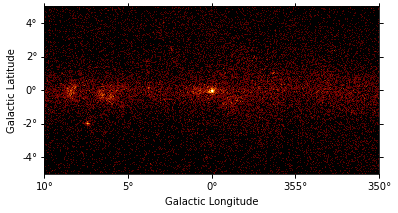

In [15]:
plt.figure()
gc_3fhl.plot(stretch='sqrt')

<WCSAxesSubplot:xlabel='Galactic Longitude', ylabel='Galactic Latitude'>

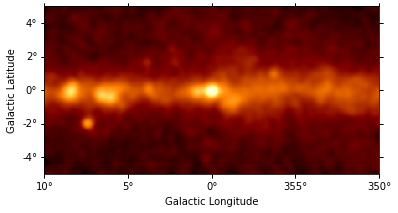

In [17]:
plt.figure()
smoothed = gc_3fhl.smooth(kernel='gauss', width=0.2 * u.deg)
smoothed.plot(stretch='sqrt')

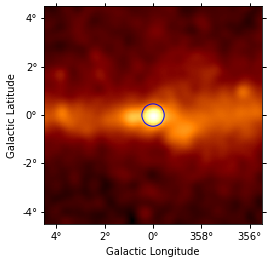

In [30]:
plt.figure()
centre = SkyCoord(0, 0, unit='deg', frame='galactic')
cutout = smoothed.cutout(centre, 9 * u.deg)
cutout_plot = cutout.plot(stretch='sqrt')
plt.scatter([0], [0], s=500, transform=cutout_plot.get_transform('galactic'), edgecolor='blue', facecolor='none')

In [31]:
from gammapy.data import EventList

In [32]:
events_3fhl = EventList.read('$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-events.fits.gz')

In [33]:
print(events_3fhl.table)

  ENERGY      RA       DEC         L      ... DIFRSP1 DIFRSP2 DIFRSP3 DIFRSP4
   MeV       deg       deg        deg     ...                                
--------- --------- ---------- ---------- ... ------- ------- ------- -------
12186.642 260.45935 -33.553337  353.36273 ...     0.0     0.0     0.0     0.0
25496.598 261.37506 -34.395004  353.09607 ...     0.0     0.0     0.0     0.0
15621.498 259.56973 -33.409416  353.05673 ...     0.0     0.0     0.0     0.0
 12816.32 273.95883 -25.340391    6.45856 ...     0.0     0.0     0.0     0.0
18988.387  260.8568 -36.355804  351.23734 ...     0.0     0.0     0.0     0.0
 11610.23 266.15518 -26.224436  2.1986027 ...     0.0     0.0     0.0     0.0
      ...       ...        ...        ... ...     ...     ...     ...     ...
13911.061 269.30997 -27.239439  2.7684028 ...     0.0     0.0     0.0     0.0
13226.425 265.16287 -27.344238  0.7796942 ...     0.0     0.0     0.0     0.0
17445.463 266.63342 -28.807201 0.21464892 ...     0.0     0.0   

In [34]:
print(events_3fhl.table.colnames)

['ENERGY', 'RA', 'DEC', 'L', 'B', 'THETA', 'PHI', 'ZENITH_ANGLE', 'EARTH_AZIMUTH_ANGLE', 'TIME', 'EVENT_ID', 'RUN_ID', 'RECON_VERSION', 'CALIB_VERSION', 'EVENT_CLASS', 'EVENT_TYPE', 'CONVERSION_TYPE', 'LIVETIME', 'DIFRSP0', 'DIFRSP1', 'DIFRSP2', 'DIFRSP3', 'DIFRSP4']


In [35]:
print(events_3fhl.energy.to(u.GeV))

[12.186643 25.4966   15.621499 ... 32.095707 18.465784 14.457251] GeV


In [36]:
from gammapy.utils.regions import SphericalCircleSkyRegion

In [41]:
region = SphericalCircleSkyRegion(centre, radius=0.5 * u.deg)
events_gc_3fhl = events_3fhl.select_region(region)

In [43]:
events_gc_3fhl.table.sort('ENERGY')

In [54]:
events_gc_3fhl.energy[-1].to(u.GeV)

<Quantity 1917.85925 GeV>

In [45]:
region_2 = SphericalCircleSkyRegion(centre, radius=10 * u.deg)
events_exercise = events_3fhl.select_region(region_2)

In [46]:
energies = events_exercise.energy.to(u.GeV)

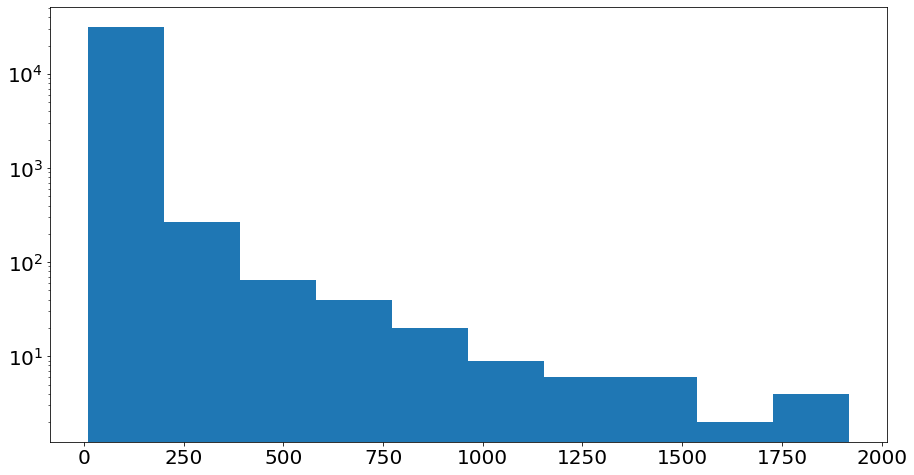

In [56]:
plt.figure(figsize=(15, 8))
plt.rc('font', size=20)
plt.hist(energies.value, density=False, log=True)
plt.show()

In [57]:
from gammapy.catalog import SourceCatalog3FHL

In [58]:
fermi_3fhl = SourceCatalog3FHL()

In [63]:
fermi_3fhl.table.show_in_notebook()

idx,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,Flux_Band [5],"Unc_Flux_Band [5,2]",nuFnu [5],Sqrt_TS_Band [5],Npred,HEP_Energy,HEP_Prob,Variability_BayesBlocks,Extended_Source_Name,ASSOC_GAM,TEVCAT_FLAG,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,Redshift,NuPeak_obs
,,deg,deg,deg,deg,deg,deg,deg,,,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,GeV,,,,,,,,,,,,,Hz
0,3FHL J0001.2-0748,0.3107,-7.8075,89.0094,-67.3118,0.0424,0.0424,--,64,5.362,23.73,5.3174e-13,2.0975e-13,2.9593e-11,1.1704e-11,1.6752e-12,1.0743e-12,1.02,PowerLaw,1.6724,0.8274,0.5916,0.7129,2.2226,0.4808,1.1127661e-11 .. 1.1422301e-22,-6.0763976e-12 .. 6.529277e-12,3.533989e-13 .. 1.1789072e-22,3.1458344 .. 0.0,7.63,86.975,0.9964,1,,3FGL J0001.2-0748,N,,bll,PMN J0001-0746,,0.9974,0.9721,--,306196370000000.0
1,3FHL J0001.9-4155,0.4849,-41.9303,334.1216,-72.0697,0.1018,0.1018,--,429,5.638,28.42,5.4253e-13,1.6839e-13,4.3230e-11,1.3428e-11,3.4900e-12,1.8276e-12,0.45,PowerLaw,1.7819,0.4941,0.1187,0.2798,1.9418,0.3100,2.1003905e-11 .. 1.9287885e-18,-8.032091e-12 .. 5.8594097e-12,6.7452245e-13 .. 2.078675e-18,4.899907 .. 0.0,12.51,266.625,0.9622,1,,3FGL J0002.2-4152,N,,bcu,1RXS J000135.5-415519,,0.9960,0.0000,--,6309576500000000.0
2,3FHL J0002.1-6728,0.5283,-67.4825,310.0868,-48.9549,0.0357,0.0357,--,386,8.470,20.82,1.2062e-12,3.2106e-13,5.0093e-11,1.3349e-11,2.3058e-12,9.5580e-13,1.53,PowerLaw,1.8109,0.6260,0.7933,0.5956,2.4285,0.3710,2.4550664e-11 .. 1.9009976e-21,-8.634195e-12 .. 4.8021903e-12,7.7340695e-13 .. 1.9026535e-21,5.900217 .. 0.0,17.11,52.152,0.9988,1,,3FGL J0002.0-6722,N,,bcu,SUMSS J000215-672653,,0.0000,0.9395,--,4466832000000000.0
3,3FHL J0003.3-5248,0.8300,-52.8150,318.9245,-62.7936,0.0425,0.0425,--,145,7.229,23.66,7.5065e-13,2.3102e-13,4.1560e-11,1.2839e-11,2.2874e-12,1.1145e-12,1.70,PowerLaw,1.6010,0.5644,0.9972,0.1721,2.2481,0.3732,2.0886386e-11 .. 7.5867555e-23,-8.143967e-12 .. 5.31299e-12,6.6265456e-13 .. 7.800202e-23,5.298393 .. 0.0,13.02,67.310,0.9636,1,,3FGL J0003.2-5246,N,,bcu,RBS 0006,,0.9996,0.9716,--,7.079464e+16
4,3FHL J0007.0+7303,1.7647,73.0560,119.6625,10.4666,0.0101,0.0101,--,277,75.265,12.80,1.7436e-10,7.5950e-12,1.5308e-09,6.1341e-11,3.6785e-11,1.5973e-12,3.24,LogParabola,3.1751,0.2103,0.9021,0.2659,3.8315,0.1141,1.3514667e-09 .. 3.839895e-18,-5.7581186e-11 .. 4.060418e-12,4.109739e-11 .. 2.9231144e-18,71.33829 .. 0.0,654.15,60.292,0.9972,1,,3FGL J0007.0+7302,E,CTA 1,PSR,LAT PSR J0007+7303,,1.0000,0.0000,--,--
5,3FHL J0007.9+4711,1.9931,47.1920,115.3093,-15.0354,0.0196,0.0196,--,302,17.774,17.19,5.9778e-12,8.7683e-13,1.5131e-10,2.2181e-11,5.1444e-12,1.0540e-12,0.56,PowerLaw,2.6783,0.4196,0.1696,0.3282,2.8588,0.2685,1.0582407e-10 .. 1.9819723e-16,-1.7538379e-11 .. 4.823511e-12,3.278615e-12 .. 1.8668298e-16,15.209969 .. 0.0,50.95,68.152,0.9759,1,,3FGL J0008.0+4713,N,,bll,MG4 J000800+4712,,1.0000,0.9873,0.2800,2511884200000000.0
6,3FHL J0008.4-2339,2.1243,-23.6514,50.2908,-79.7021,0.0366,0.0366,--,517,9.679,16.96,3.0610e-12,7.3475e-13,7.4602e-11,1.7896e-11,2.4733e-12,8.1716e-13,0.34,PowerLaw,2.7388,0.7145,0.1737,0.5618,2.9070,0.4520,5.804992e-11 .. 1.1117311e-20,-1.4419374e-11 .. 6.10661e-12,1.7951775e-12 .. 1.0403958e-20,9.133706 .. 0.0,19.83,71.122,0.9968,1,,3FGL J0008.6-2340,N,,bll,RBS 0016,,0.9996,0.9673,0.1470,524807800000000.0
7,3FHL J0009.1+0628,2.2874,6.4814,104.4637,-54.8669,0.0385,0.0385,--,402,6.282,18.92,1.2691e-12,4.3696e-13,4.1597e-11,1.4317e-11,1.6903e-12,8.9372e-13,0.10,PowerLaw,2.5529,0.8363,0.0122,0.4477,2.5800,0.5391,2.4161059e-11 .. 6.6482124e-19,-9.546595e-12 .. 6.287476e-12,7.566492e-13 .. 6.5095056e-19,4.678369 .. 0.0,10.95,12.256,0.9721,1,,3FGL J0009.1+0630,N,,bl

In [64]:
fermi_3fhl.table.sort('Signif_Avg')

In [65]:
top_five_TS_3fhl = fermi_3fhl.table[::-1][:5]

In [66]:
top_five_TS_3fhl[["Source_Name", "ASSOC1", "ASSOC2", "CLASS", "Signif_Avg"]].show_in_notebook()

idx,Source_Name,ASSOC1,ASSOC2,CLASS,Signif_Avg
0,3FHL J0534.5+2201,Crab Nebula,,PWN,168.641
1,3FHL J1104.4+3812,Mkn 421,,BLL,144.406
2,3FHL J0835.3-4510,PSR J0835-4510,Vela X field,PSR,138.801
3,3FHL J0633.9+1746,PSR J0633+1746,,PSR,99.734
4,3FHL J1555.7+1111,PG 1553+113,,BLL,94.411


In [67]:
mkn_421_3fhl = fermi_3fhl['3FHL J1104.4+3812']

In [68]:
mkn_421_3fhl.data["Signif_Avg"]

144.40611

In [72]:
from gammapy.catalog import SourceCatalog2FHL
fermi_2fhl = SourceCatalog2FHL()

In [75]:
fermi_2fhl.table.show_in_notebook()

idx,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,,deg,deg,deg,deg,deg,deg,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),1 / (cm2 s),1 / (cm2 s),,1 / (cm2 s),1 / (cm2 s),,1 / (cm2 s),1 / (cm2 s),,,GeV,,,,,,,,Hz,,,
0,2FHL J0008.1+4709,2.044,47.164,115.339,-15.069,0.061,0.098,28.6,6.24,2.75,3.96,3.19,2.16,4.21,1.2300e-11,6.7100e-12,1.2100e-12,6.7100e-13,3.3634e-12,-1.5367e-12 .. 2.1609e-12,5.35,4.3495e-18,-- .. 4.7539e-12,0.00,8.4487e-18,-- .. 7.2910e-12,0.00,4.00,68.15,0.99,1,MG4 J000800+4712,0.9972,0.8348,bll,2.10000,2.5119e+15,3FGL J0008.0+4713,1FHL J0007.7+4709,--
1,2FHL J0009.3+5031,2.343,50.522,116.124,-11.793,0.045,0.073,54.0,5.08,1.66,--,--,--,--,1.9100e-11,7.8200e-12,2.0300e-12,8.7900e-13,8.3628e-12,-2.9896e-12 .. 3.8951e-12,7.35,2.9146e-17,-- .. 5.1000e-12,0.00,3.5087e-16,-- .. 4.8746e-12,0.00,6.40,72.76,1.00,1,NVSS J000922+503028,0.9997,0.7348,bll,0.00000,1.4125e+15,3FGL J0009.3+5030,1FHL J0009.2+5032,--
2,2FHL J0018.5+2947,4.635,29.788,114.463,-32.542,0.037,0.060,30.9,2.58,0.99,2.41,1.04,2.40,1.04,1.0600e-11,6.1500e-12,2.0500e-12,1.7200e-12,9.6544e-12,-5.5534e-12 .. 5.5534e-12,5.77,1.1790e-15,-- .. 5.3787e-12,0.00,1.6047e-16,-- .. 6.1201e-12,0.00,3.00,127.32,1.00,3,RBS 0042,0.9999,0.9785,bll,0.10000,5.9156e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,--
3,2FHL J0022.0+0006,5.500,0.106,107.172,-61.862,0.051,0.082,30.0,1.86,0.57,0.95,0.72,0.88,0.71,1.9700e-11,9.5600e-12,6.8600e-12,5.2900e-12,1.6120e-11,-7.1726e-12 .. 9.9535e-12,5.38,3.6392e-12,-4.3864e-12 .. 4.3864e-12,1.39,8.4236e-16,-- .. 7.3424e-12,0.00,4.80,180.13,0.86,2,5BZGJ0022+0006,0.9993,0.9001,bll-g,0.30600,4.3152e+16,--,--,--
4,2FHL J0033.6-1921,8.411,-19.358,94.280,-81.222,0.035,0.056,148.3,3.32,0.69,2.56,0.88,2.33,0.92,5.4600e-11,1.5000e-11,7.6200e-12,2.6900e-12,4.0016e-11,-1.0162e-11 .. 1.2238e-11,12.17,2.1390e-12,-- .. 8.2581e-12,0.91,2.4395e-17,-- .. 6.8423e-12,0.00,13.80,170.01,0.99,2,KUV 00311-1938,0.9998,0.9814,bll,0.61000,8.3176e+15,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-193
5,2FHL J0035.8+5949,8.962,59.831,120.972,-2.981,0.032,0.051,402.4,2.23,0.21,--,--,--,--,1.2500e-10,1.9000e-11,3.1100e-11,7.2300e-12,9.4229e-11,-1.5257e-11 .. 1.7157e-11,17.31,2.6699e-11,-7.6282e-12 .. 9.4508e-12,10.39,3.7261e-16,-- .. 4.6744e-12,0.00,46.50,247.62,0.96,4,1ES 0033+595,1.0000,0.9929,bll,0.00000,1.3183e+17,3FGL J0035.9+5949,1FHL J0035.9+5950,TeV J0035+598
6,2FHL J0040.3+4049,10.095,40.832,120.676,-21.992,0.036,0.057,26.8,2.12,0.81,--,--,--,--,1.0500e-11,6.3000e-12,2.8400e-12,2.6700e-12,7.4158e-12,-4.0778e-12 .. 6.4518e-12,4.95,3.0031e-12,-2.3178e-12 .. 4.4664e-12,1.71,4.7317e-16,-- .. 5.7981e-12,0.00,3.20,258.77,0.85,3,B3 0037+405,0.9987,0.9347,bcu I,0.00000,1.0000e+00,3FGL J0040.3+4049,1FHL J0040.3+4049,--
7,2FHL J0043.9+3424,10.976,34.411,121.164,-28.435,0.059,0.095,39.5,4.57,1.61,3.46,1.85,2.95,1.91,1.8300e-11,8.2400e-12,2.0300e-12,9.9300e-13,9.6576e-12,-4.3169e-12 .. 4.3169e-12,6.31,8.7586e-17,-- .. 5.2433e-12,0.00,9.4381e-16,-- .. 5.6879e-12,0.00,5.40,109.97,0.90,3,GB6 J0043+3426,0.9986,0.8388,fsrq,0.96600,6.4565e+13,3FGL J0043.8+3425,1FHL J0043.7+3425,--
8,2FHL J0045.2+2127,11.316,21.455,121.017,-41.393,0.038,0.061,110.4,3.07,0.64,--,--,--,--,4.1400e-11,1.2600e-11,6.2900e-12,2.4500e-12,3.1153e-11,-8.9301e-12 .. 1.1010e-11,10.24,2.9971e-12,-3.0305e-12 .. 3.0305e-12,2.71,4.6835e-17,-- .. 6.4231e-12,0.00,11.40,246.75,0.99,5,GB6 J0045+2127,0.9996,0.9651,bll,0.00000,1.0023e+16,3FGL J0045.3+2126,1FHL J0045.2+2126,--


In [81]:
fermi_2fhl.positions

<SkyCoord (ICRS): (ra, dec) in deg
    [(  2.0437,  47.1642), (  2.3435,  50.5217), (  4.6355,  29.7879),
     (  5.5001,   0.1059), (  8.4115, -19.3575), (  8.9625,  59.8312),
     ( 10.0949,  40.8315), ( 10.9755,  34.4109), ( 11.3161,  21.4555),
     ( 12.0023,  54.8281), ( 12.8216, -62.705 ), ( 13.7007, -24.9193),
     ( 17.5357,  68.103 ), ( 18.6212,  13.3913), ( 18.7342, -33.9944),
     ( 18.9521,  25.33  ), ( 20.1255, -27.0409), ( 20.9299, -23.1482),
     ( 22.7713,  61.3346), ( 24.1272,  39.113 ), ( 24.5594,  58.1984),
     ( 25.3361,  -9.4568), ( 25.9716, -58.7962), ( 27.0461,  52.0242),
     ( 28.2012,   1.7799), ( 28.3751,  71.2331), ( 29.2601, -53.0287),
     ( 31.3562,  64.841 ), ( 32.3367, -52.4821), ( 32.8018,  10.8461),
     ( 33.4938, -69.8169), ( 33.7339,  51.8293), ( 33.7476,  75.9294),
     ( 35.285 ,  35.9334), ( 35.6671,  43.033 ), ( 37.7576, -57.9238),
     ( 39.4024, -36.0965), ( 39.6241, -31.2745), ( 39.7166,  16.5293),
     ( 40.1271,  61.2168), ( 40.378 ,  65.

In [83]:
crab_3fhl = fermi_3fhl['Crab Nebula']

In [84]:
crab_spec = crab_3fhl.spectral_model()

In [90]:
print(crab_spec)

PowerLawSpectralModel

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral     index 2.2202e+00                ... nan  False   False     
spectral amplitude 1.7132e-10 cm-2 GeV-1 s-1 ... nan  False    True     
spectral reference 2.2726e+01            GeV ... nan   True   False     


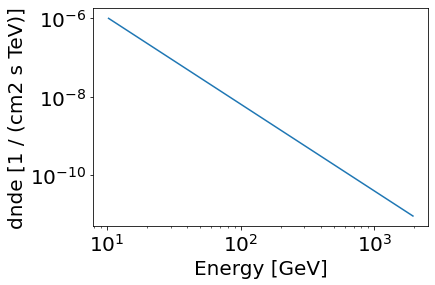

In [101]:
plt.figure()
ax_crab = crab_spec.plot(energy_bounds=[10, 2000] * u.GeV, energy_power=0)
plt.show()

In [93]:
crab_spec(100 * u.GeV).to(u.cm ** -2 / u.s / u.GeV)

<Quantity 6.38489128e-12 1 / (cm2 GeV s)>

In [94]:
crab_3fhl.data['Flux']

<Quantity 8.658909e-09 1 / (cm2 s)>

In [96]:
crab_spec.energy_flux(energy_min=10 * u.GeV, energy_max=2000 * u.GeV).to(u.erg / u.cm ** 2 / u.s) 

<Quantity 5.31148917e-10 erg / (cm2 s)>

In [97]:
print(crab_3fhl.flux_points)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 5)
  quantities             : ['norm', 'norm_errp', 'norm_errn', 'norm_ul', 'sqrt_ts', 'is_ul']
  ref. model             : pl
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 1
  sed type init          : flux



In [98]:
crab_3fhl.flux_points.to_table(sed_type='dnde', formatted=True).show_in_notebook()

idx,e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,sqrt_ts,is_ul
,GeV,GeV,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),,
0,14.142,10.000,20.000,5.120e-10,1.321e-11,1.321e-11,nan,125.157,False
1,31.623,20.000,50.000,7.359e-11,2.842e-12,2.842e-12,nan,88.715,False
2,86.603,50.000,150.000,9.024e-12,5.367e-13,5.367e-13,nan,59.087,False
3,273.861,150.000,500.000,7.660e-13,8.707e-14,8.097e-14,nan,33.076,False
4,1000.000,500.000,2000.000,4.291e-14,1.086e-14,9.393e-15,nan,15.573,False


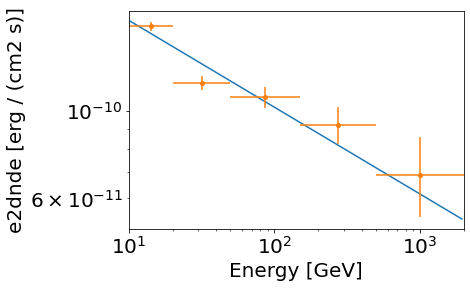

In [103]:
plt.figure()
ax = crab_spec.plot(energy_bounds=[10, 2000] * u.GeV, sed_type='e2dnde')
crab_3fhl.flux_points.plot(ax=ax, sed_type='e2dnde')
plt.show()

In [104]:
from IPython.display import display

In [105]:
from gammapy.data import DataStore

In [106]:
datastore = DataStore.from_dir('$GAMMAPY_DATA/hess-dl3-dr1')

In [108]:
datastore.info()

Data store:
HDU index table:
BASE_DIR: gammapy-data/1.0.1/hess-dl3-dr1
Rows: 630
OBS_ID: 20136 -- 47829
HDU_TYPE: ['aeff', 'bkg', 'edisp', 'events', 'gti', 'psf']
HDU_CLASS: ['aeff_2d', 'bkg_3d', 'edisp_2d', 'events', 'gti', 'psf_table']


Observation table:
Observatory name: 'N/A'
Number of observations: 105



In [111]:
datastore.obs_table[:2][['OBS_ID', 'DATE-OBS', 'RA_PNT', 'DEC_PNT', 'OBJECT']]

OBS_ID,DATE-OBS,RA_PNT,DEC_PNT,OBJECT
,,deg,deg,
int64,bytes10,float32,float32,bytes18
20136,2004-03-26,228.6125,-58.771667,MSH15-52
20137,2004-03-26,228.6125,-59.771667,MSH15-52


In [113]:
display(datastore.obs_table[:2][['OBS_ID', 'DATE-OBS', 'RA_PNT', 'DEC_PNT', 'OBJECT']])

OBS_ID,DATE-OBS,RA_PNT,DEC_PNT,OBJECT
,,deg,deg,
int64,bytes10,float32,float32,bytes18
20136,2004-03-26,228.6125,-58.771667,MSH15-52
20137,2004-03-26,228.6125,-59.771667,MSH15-52


In [112]:
datastore.obs_table[:2][['OBS_ID', 'DATE-OBS', 'RA_PNT', 'DEC_PNT', 'OBJECT']].show_in_notebook()

idx,OBS_ID,DATE-OBS,RA_PNT,DEC_PNT,OBJECT
,,,deg,deg,
0,20136,2004-03-26,228.6125,-58.771667,MSH15-52
1,20137,2004-03-26,228.6125,-59.771667,MSH15-52


In [115]:
obs = datastore.obs(23523)

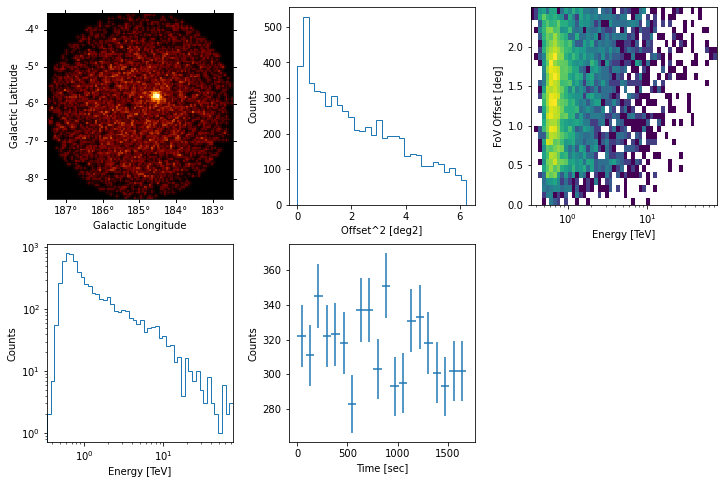

In [118]:
plt.rc('font', size=10)
obs.events.select_offset([0, 2.5] * u.deg).peek()

/Users/Leo/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


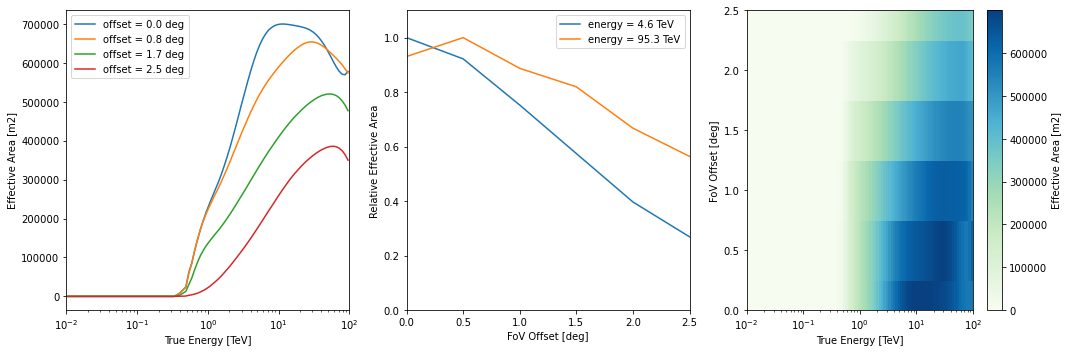

In [119]:
obs.aeff.peek()

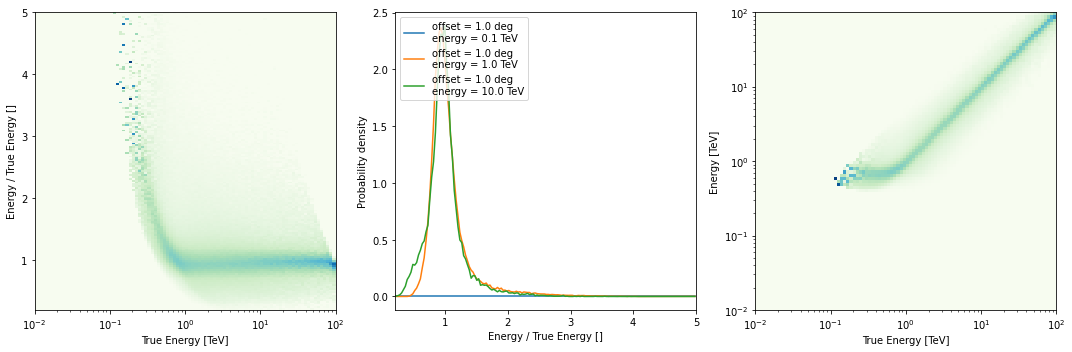

In [120]:
obs.edisp.peek()

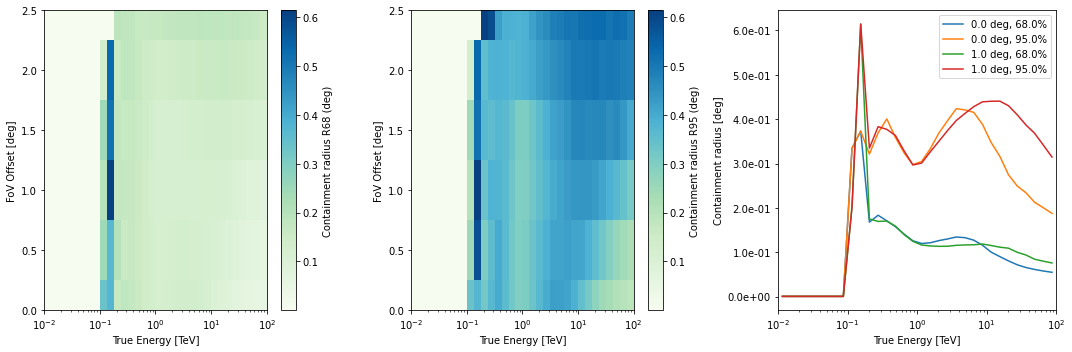

In [121]:
obs.psf.peek()

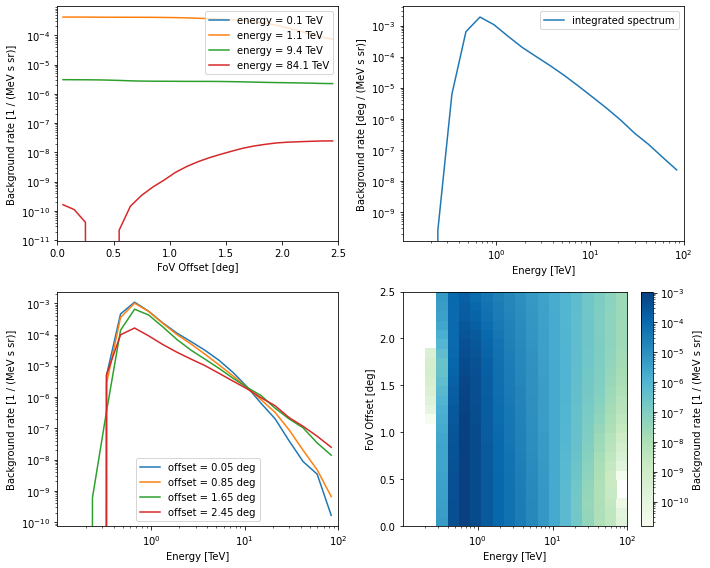

In [122]:
obs.bkg.to_2d().peek()

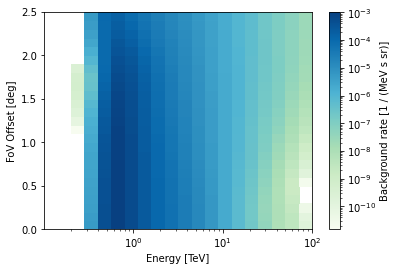

In [123]:
plt.figure()
obs.bkg.to_2d().plot()

In [124]:
from gammapy.maps import MapAxis

In [125]:
position = SkyCoord(ra=83.63, dec=22.01, unit='deg', frame='icrs')
theta2_axis = MapAxis.from_bounds(0, 0.2, nbin=20, interp='lin', unit='deg2')

In [127]:
from gammapy.makers.utils import make_theta_squared_table
from gammapy.visualization import plot_theta_squared_table

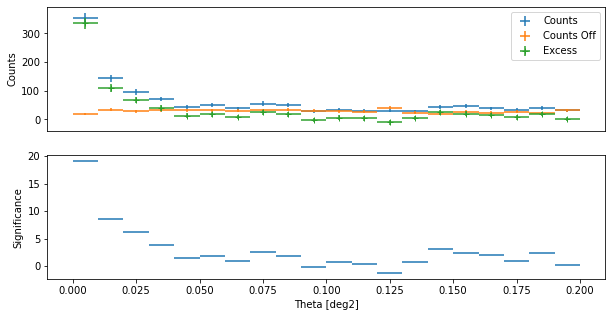

In [128]:
observations = datastore.get_observations([23523, 23526])
theta2_table = make_theta_squared_table(observations=observations, position=position, theta_squared_axis=theta2_axis)

plt.figure(figsize=(10, 5))
plot_theta_squared_table(theta2_table)

In [131]:
from gammapy.maps import WcsGeom
from gammapy.makers import MapDatasetMaker

Number of observations: 17


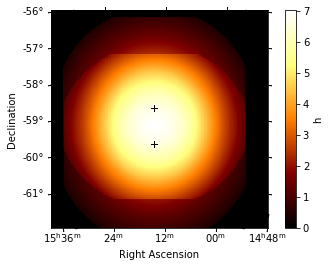

In [135]:
obs_id = datastore.obs_table['OBS_ID'][datastore.obs_table['OBJECT'] == 'MSH 15-5-02']
observations = datastore.get_observations(obs_id)
print('Number of observations:', len(observations))

energy_min = 100 * u.GeV
energy_max = 10 * u.TeV
offset_max = 2.5 * u.deg

source_pos = SkyCoord(228.32, -59.08, unit='deg')
energy_axis_true = MapAxis.from_energy_bounds(energy_min=energy_min, energy_max=energy_max, 
                                              nbin=1, name='energy_true')

geom = WcsGeom.create(skydir=source_pos, binsz=0.02, width=(6, 6), frame='icrs', proj='CAR', axes=[energy_axis_true])
livetime = Map.from_geom(geom, unit=u.hr)
for obs in observations:
    geom_obs = geom.cutout(position=obs.pointing_radec, width=2 * offset_max)
    exposure = MapDatasetMaker.make_exposure(geom=geom_obs, observation=obs)
    on_axis = obs.aeff.evaluate(offset=0 * u.deg, energy_true=geom.axes['energy_true'].center)
    on_axis = on_axis.reshape(on_axis.shape[0], 1, 1)
    lv_obs = exposure / on_axis
    livetime.stack(lv_obs)
    
plt.figure()
ax = livetime.plot(add_cbar=True)

for obs in observations:
    ax.plot(obs.pointing_radec.to_pixel(wcs=ax.wcs)[0], obs.pointing_radec.to_pixel(wcs=ax.wcs)[1], '+', c='k')

plt.show()